<a href="https://colab.research.google.com/github/Dermapp/DataPreprocessing/blob/master/digitalHairRemover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
 download = drive.CreateFile({'id' : '1egI02bfGIzP47tDnHnGU2_W1dXRi0Axc'})
 download.GetContentFile('skin_image.zip')
 ! unzip skin_image.zip 

Archive:  skin_image.zip
   creating: skin_image/
  inflating: skin_image/prototype_1.py  
   creating: skin_image/test/
   creating: skin_image/test/akeic/
 extracting: skin_image/test/akeic/ISIC_0030341.jpg  
  inflating: skin_image/test/akeic/ISIC_0030344.jpg  
 extracting: skin_image/test/akeic/ISIC_0030375.jpg  
  inflating: skin_image/test/akeic/ISIC_0030387.jpg  
  inflating: skin_image/test/akeic/ISIC_0030408.jpg  
 extracting: skin_image/test/akeic/ISIC_0030463.jpg  
 extracting: skin_image/test/akeic/ISIC_0030487.jpg  
 extracting: skin_image/test/akeic/ISIC_0030491.jpg  
  inflating: skin_image/test/akeic/ISIC_0030549.jpg  
  inflating: skin_image/test/akeic/ISIC_0030586.jpg  
  inflating: skin_image/test/akeic/ISIC_0030591.jpg  
 extracting: skin_image/test/akeic/ISIC_0030602.jpg  
 extracting: skin_image/test/akeic/ISIC_0030655.jpg  
 extracting: skin_image/test/akeic/ISIC_0030707.jpg  
  inflating: skin_image/test/akeic/ISIC_0030714.jpg  
  inflating: skin_image/test/akei

In [0]:
import cv2
src = cv2.imread("/content/skin_image/train/bcc/ISIC_0025260.jpg")


(450, 600, 3)


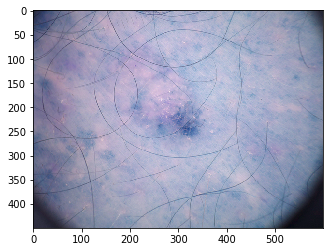

In [0]:
import matplotlib.pyplot as plt
print( src.shape )
plt.imshow( src )

True

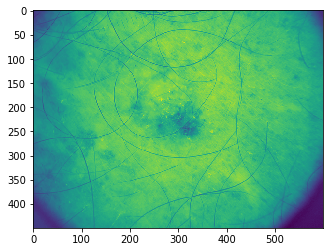

In [0]:
# Convert the original image to grayscale
grayScale = cv2.cvtColor( src, cv2.COLOR_RGB2GRAY )
plt.imshow(grayScale)
cv2.imwrite('grayScale_sample1.jpg', grayScale, [int(cv2.IMWRITE_JPEG_QUALITY), 90])


True

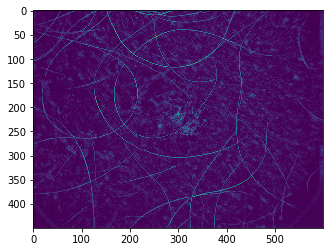

In [0]:
# Kernel for the morphological filtering
kernel = cv2.getStructuringElement(1,(17,17))

# Perform the blackHat filtering on the grayscale image to find the 
# hair countours
blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(blackhat)
cv2.imwrite('blackhat_sample1.jpg', blackhat, [int(cv2.IMWRITE_JPEG_QUALITY), 90])


In [0]:
# intensify the hair countours in preparation for the inpainting 
# algorithm
ret,thresh2 = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
print( thresh2.shape )
#plt.imshow(thresh2)
cv2.imwrite('thresholded_sample1.jpg', thresh2, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

# inpaint the original image depending on the mask
dst = cv2.inpaint(src,thresh2,1,cv2.INPAINT_TELEA)
#plt.imshow(dst)
cv2.imwrite('final_image.jpg',dst,[int(cv2.IMWRITE_JPEG_QUALITY),90])

(450, 600)


True

In [0]:
class DigitalRazor:
  def removeHairs(image):
    grayScale = cv2.cvtColor( src, cv2.COLOR_RGB2GRAY )
    # Kernel for the morphological filtering
    kernel = cv2.getStructuringElement(1,(17,17))

    # Perform the blackHat filtering on the grayscale image to find the 
    # hair countours
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    #cv2.imwrite('blackhat_sample1.jpg', blackhat, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
    # intensify the hair countours in preparation for the inpainting 
    # algorithm
    ret,thresh2 = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    #print( thresh2.shape )
    #plt.imshow(thresh2)
    #cv2.imwrite('thresholded_sample1.jpg', thresh2, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
    # inpaint the original image depending on the mask
    dst = cv2.inpaint(src,thresh2,1,cv2.INPAINT_TELEA)
    #plt.imshow(dst)
    #cv2.imwrite('final_image.jpg',dst,[int(cv2.IMWRITE_JPEG_QUALITY),90])
    return dst